<a href="https://colab.research.google.com/github/victoria-mischley/pipeline_colabfold_batch/blob/main/homework2_python_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First off, you need to open this notebook in Google Colab. So download this notebook and upload it to your Google Drive. Once it's in your Google Drive, you can open it with Google Colab.

The solutions to the following exercises can all be provided by ChatGPT or found online. However, we encourage you to at least think about the algorithm you would use first. If you use code that you didn't develop yourself, you should review it carefully to make sure you understand with what it is doing, and make sure it isn't doing something wrong.

# Taking geometric measurements in Python

In this section, you will make tools for yourself to measure geometry relating several cartesian points. This information is frequently necessary in the study of proteins. You will likely make use of the `numpy` library.

## Problem 1: Distance

Write a Python function calculate_distance(point1, point2) that takes two points as input, where each point is represented as a tuple of three coordinates (x, y, z). The function should calculate and return the Euclidean distance between the two points.

In [ ]:
#my code
import math

def calculate_distance(point1, point2):
    x1, y1, z1 = point1
    x2, y2, z2 = point2

    distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2 + (z2 - z1) ** 2)
    return distance


In [ ]:
# Implement your code for Problem 1 in this cell.
point1 = (1, 2, 3)
point2 = (4, 5, 6)

distance = calculate_distance(point1, point2)
print("Euclidean distance:", distance)


Euclidean distance: 5.196152422706632


## Problem 2: Angle

Write a Python function calculate_angle(point1, point2, point3) that takes three points as input. Again, each point is represented as a tuple of three coordinates. The function should calculate and return the angle (in degrees) formed by the vectors connecting point1 to point2 and point2 to point3.

In [ ]:
#my code
import math

def calculate_angle(point1, point2, point3):
    # Calculate the vectors from point1 to point2 and point2 to point3
    vector1 = (point2[0] - point1[0], point2[1] - point1[1], point2[2] - point1[2])
    vector2 = (point3[0] - point2[0], point3[1] - point2[1], point3[2] - point2[2])

    # Calculate the dot product of the two vectors
    dot_product = sum(v1 * v2 for v1, v2 in zip(vector1, vector2))
    # Calculate the magnitudes of the vectors
    magnitude1 = math.sqrt(sum(v ** 2 for v in vector1))
    magnitude2 = math.sqrt(sum(v ** 2 for v in vector2))

    # Calculate the cosine of the angle
    cosine_angle = dot_product / (magnitude1 * magnitude2)

    # Calculate the angle in radians and convert it to degrees
    angle_in_radians = math.acos(cosine_angle)
    angle_in_degrees = math.degrees(angle_in_radians)
    return angle_in_degrees


In [ ]:
point1 = (1, 5, 3)
point2 = (4, 5, 6)
point3 = (7, 8, 9)

angle = calculate_angle(point1, point2, point3)
print("Angle (in degrees):", angle)


18
4.242640687119285
5.196152422706632
0.816496580927726
0.6154797086703874
Angle (in degrees): 35.264389682754654


## Problem 3: Dihedral/Torsion

Write a Python function calculate_torsion_angle(point1, point2, point3, point4) that takes four points as input. Each point is represented as a tuple of three coordinates. The function should calculate and return the torsion (dihedral) angle (in degrees) formed by the plane defined by the vectors connecting point1 to point2 and point2 to point3, and the plane defined by the vectors connecting point2 to point3 and point3 to point4.

In [ ]:
#my code
import math

def calculate_torsion_angle(point1, point2, point3, point4):
    # Calculate the vectors between the points
    vector1 = (point2[0] - point1[0], point2[1] - point1[1], point2[2] - point1[2])
    vector2 = (point3[0] - point2[0], point3[1] - point2[1], point3[2] - point2[2])
    vector3 = (point4[0] - point3[0], point4[1] - point3[1], point4[2] - point3[2])

    # Calculate the normal vectors of the planes defined by the points
    normal1 = (
        vector1[1] * vector2[2] - vector1[2] * vector2[1],
        vector1[2] * vector2[0] - vector1[0] * vector2[2],
        vector1[0] * vector2[1] - vector1[1] * vector2[0]
    )

    normal2 = (
        vector2[1] * vector3[2] - vector2[2] * vector3[1],
        vector2[2] * vector3[0] - vector2[0] * vector3[2],
        vector2[0] * vector3[1] - vector2[1] * vector3[0]
    )

    # Calculate the dot product of the two normal vectors
    dot_product = sum(n1 * n2 for n1, n2 in zip(normal1, normal2))

    # Calculate the cross product of the two normal vectors
    cross_product = (
        normal1[1] * normal2[2] - normal1[2] * normal2[1],
        normal1[2] * normal2[0] - normal1[0] * normal2[2],
        normal1[0] * normal2[1] - normal1[1] * normal2[0]
    )

    # Calculate the torsion (dihedral) angle in radians using the arctangent function
    torsion_angle = math.atan2(dot_product, sum(c ** 2 for c in cross_product))

    # Convert the angle to degrees
    torsion_angle_degrees = math.degrees(torsion_angle)

    return torsion_angle_degrees


In [ ]:
point1 = (1, 3, 3)
point2 = (4, 5, 6)
point3 = (7, 8, 9)
point4 = (10, 15, 12)

angle = calculate_torsion_angle(point1, point2, point3, point4)
print("Torsion angle (in degrees):", angle)


Torsion angle (in degrees): 90.0


## Execute your code

In [ ]:
point1 = (0, 0, 0)
point2 = (1, 1, 1)
point3 = (2, 0, 1)
point4 = (3, 1, 2)

distance = calculate_distance(point1, point2)
angle = calculate_angle(point1, point2, point3)
torsion_angle = calculate_torsion_angle(point1, point2, point3, point4)

print("Distance:", distance)
print("Angle:", angle)
print("Torsion Angle:", torsion_angle)

Distance: 1.7320508075688772
Angle: 90.0
Torsion Angle: -90.0


# Introduction to Pandas DataFrame

In this exercise, you will be introduced to the basics of working with Pandas DataFrames without requiring any external files. You will create a simple dataset and perform basic data manipulation tasks. This exercise is designed to be completed in under 15 minutes and is suitable for students with basic Python experience.

## Problem 4: Create a DataFrame

* Import the Pandas library
* Create a dictionary containing data about three students: names, ages, and grades
* Convert the dictionary into a Pandas DataFrame
* Display the DataFrame

In [ ]:
#my code
import pandas as pd

# Create a dictionary with data about three students
student_data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [20, 21, 22],
    'Grade': [85, 90, 78]
}

# Convert the dictionary into a Pandas DataFrame
student_df = pd.DataFrame(student_data)

# Display the DataFrame
print(student_df)


      Name  Age  Grade
0    Alice   20     85
1      Bob   21     90
2  Charlie   22     78


## Problem 5: Data Manipulation

* Calculate and print the average age of the students.
* Add a new student, "David", who is 22 years old and scored 88.
* Print the updated DataFrame.

Guidelines:
* Use the pandas library to create and manipulate the DataFrame.
* Utilize DataFrame functions like mean() and append() to achieve the tasks.

This is an introductory exercise. Pandas is a large library with lots of useful tools that are not covered in the scope of our course. You can read more about it in the [pandas documentation](https://pandas.pydata.org/docs/user_guide/index.html).

In [ ]:
#my code
# Calculate and print the average age of the students
average_age = student_df['Age'].mean()
print("Average Age of Students:", average_age)

# Add a new student "David" to the DataFrame
new_student_data = {'Name': 'David', 'Age': 22, 'Grade': 88}
student_df = student_df.append(new_student_data, ignore_index=True)

# Print the updated DataFrame
print("\nUpdated DataFrame:")
print(student_df)



Average Age of Students: 21.0

Updated DataFrame:
      Name  Age  Grade
0    Alice   20     85
1      Bob   21     90
2  Charlie   22     78
3    David   22     88


<ipython-input-2-b5846daf15fe>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  student_df = student_df.append(new_student_data, ignore_index=True)


In [ ]:
#my code
# Calculate and print the average age of the students
average_age = student_df['Age'].mean()
print("Average Age of Students:", average_age)

# Add a new student "David" to the DataFrame
new_student_data = {'Name': 'Mary', 'Age': 30, 'Grade': 95}
student_df = pd.concat(new_student_data, ignore_index=True)

# Print the updated DataFrame
print("\nUpdated DataFrame:")
print(student_df)



Average Age of Students: 21.25


TypeError: ignored

# Plotting in matplotlib

In this section, you will practice plotting using the `matplotlib` library. You will also practice using `numpy` arrays.

## Problem 6: Basic Plotting

In this problem, you will plot the function f(x) = x^2 for x in the range [-10, 10].

First, import the `matplotlib.pyplot` library as `plt`. Then, use the `linspace` function from the `numpy` library to create an array of 100 points between -10 and 10. Finally, plot the function f(x) = x^2 for x in the range [-10, 10].

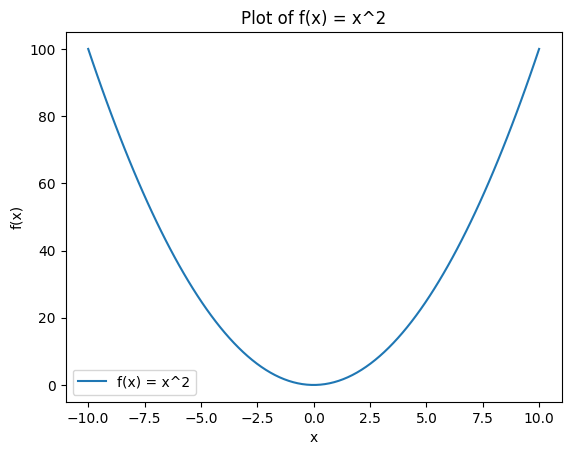

In [ ]:
#my code
import matplotlib.pyplot as plt
import numpy as np

# Create an array of 100 points between -10 and 10
x_values = np.linspace(-10, 10, 100)

# Define the function f(x) = x^2
def f(x):
    return x**2

# Calculate the corresponding y values for each x
y_values = f(x_values)

# Plot the function
plt.plot(x_values, y_values, label='f(x) = x^2')

# Add labels and title to the plot
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = x^2')

# Add a legend
plt.legend()

# Show the plot
plt.show()
